In [27]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime # for date time format
from matplotlib.ticker import FuncFormatter # to get y axis actual data instead of scientific number for plotting

In [28]:
# read the dataset
df1 = pd.read_csv(r'D:\dataset\covid 19 dataset\CovidDeaths.csv')
df2 = pd.read_csv(r'D:\dataset\covid 19 dataset\CovidVaccinations.csv')

In [29]:
# check 1st 5 row of data for dataframe1
df1.head(5)

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,Unnamed: 26,Unnamed: 27
0,AFG,Asia,Afghanistan,01-03-2020,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,01-04-2020,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,01-05-2020,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,01-06-2020,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,01-07-2020,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# check 1st 5 row of data for dataframe2
df2.head(5)

,iso_code,continent,location,date,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,1/3/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,1/4/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,1/5/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,1/6/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,1/7/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [31]:
# check the shape i.e rows and columns of both dataframe
df1.shape, df2.shape

((309799, 28), (309799, 45))

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309799 entries, 0 to 309798
Data columns (total 28 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   iso_code                            309799 non-null  object 
 1   continent                           295057 non-null  object 
 2   location                            309799 non-null  object 
 3   date                                309799 non-null  object 
 4   population                          309799 non-null  float64
 5   total_cases                         273627 non-null  float64
 6   new_cases                           300906 non-null  float64
 7   new_cases_smoothed                  299642 non-null  float64
 8   total_deaths                        252976 non-null  float64
 9   new_deaths                          301000 non-null  float64
 10  new_deaths_smoothed                 299770 non-null  float64
 11  total_cases_per_million   

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309799 entries, 0 to 309798
Data columns (total 45 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    309799 non-null  object 
 1   continent                                   295057 non-null  object 
 2   location                                    309799 non-null  object 
 3   date                                        309799 non-null  object 
 4   total_tests                                 79387 non-null   float64
 5   new_tests                                   75403 non-null   float64
 6   total_tests_per_thousand                    79387 non-null   float64
 7   new_tests_per_thousand                      75403 non-null   float64
 8   new_tests_smoothed                          103965 non-null  float64
 9   new_tests_smoothed_per_thousand             103965 non-null  float64
 

In [34]:
# use outerjoin to merge 2 dataframes
df= pd.merge(df1, df2, on=['iso_code','continent', 'location', 'date'], how='outer')

In [35]:
# check the merged dataframe columns
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'population',
       'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'Unnamed: 26', 'Unnamed: 27',
       'total_tests', 'new_tests', 'total_tests_per_thousand',
       'new_tests_per_thousand', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case',
       'tests_units', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters', 'new_vaccinati

In [36]:
# check for null values
print(df.isnull().sum())

iso_code                                        0
continent                                   20616
location                                        0
date                                            0
population                                 123483
                                            ...  
human_development_index                    200583
excess_mortality_cumulative_absolute       422613
excess_mortality_cumulative                422613
excess_mortality                           422613
excess_mortality_cumulative_per_million    422613
Length: 69, dtype: int64


In [37]:
# drop the following columns
df.drop(['new_cases', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'Unnamed: 26', 'Unnamed: 27','new_tests', 'total_tests_per_thousand',
       'new_tests_per_thousand', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case',
       'tests_units', 'people_vaccinated', 'total_boosters', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'gdp_per_capita', 'extreme_poverty', 
       'diabetes_prevalence', 'female_smokers','handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million','reproduction_rate','aged_65_older','median_age','aged_70_older','male_smokers'],
         axis = 1, inplace = True)

In [38]:
# Filter rows where continent is NaN, and display along with location and iso_code columns
fil_continent_na= df1[df1['continent'].isna()][['location', 'iso_code','continent']].copy()
# Drop duplicates to get unique location and iso_code pairs
unique_loc = fil_continent_na.drop_duplicates()
unique_loc

,location,iso_code,continent
1224,Africa,OWID_AFR,NaN
14701,Asia,OWID_ASI,NaN
85670,Europe,OWID_EUR,NaN
86900,European Union,OWID_EUN,NaN
117523,High income,OWID_HIC,NaN
155473,Low income,OWID_LIC,NaN
156697,Lower middle income,OWID_LMC,NaN
197908,North America,OWID_NAM,NaN
205891,Oceania,OWID_OCE,NaN
257236,South America,OWID_SAM,NaN


In [39]:
# Drop rows where continent is NaN
df= df.dropna(subset=['continent'])
print(df.isnull().sum())

iso_code                        0
continent                       0
location                        0
date                            0
population                 117609
total_cases                153509
new_cases_smoothed         127652
total_deaths               173908
total_tests                333279
total_vaccinations         348269
people_fully_vaccinated    353471
population_density         151020
cardiovasc_death_rate      173855
dtype: int64


In [40]:
df.shape

(412666, 13)

In [41]:
# Remove duplicates based on specified columns and keep the first occurrence
df = df.drop_duplicates(subset=['iso_code', 'continent', 'location', 'date'])

In [42]:
df.shape

(412666, 13)

In [43]:
# correlation matrix
num_df = df.select_dtypes(include=[np.number])
corr_matrix = num_df.corr()
corr_matrix

,population,total_cases,new_cases_smoothed,total_deaths,total_tests,total_vaccinations,people_fully_vaccinated,population_density,cardiovasc_death_rate
population,1.000000,0.404233,0.173395,0.370096,0.558441,0.851483,0.843358,-0.025764,-0.005831
total_cases,0.404233,1.000000,0.260101,0.833765,0.932740,0.400621,0.554432,-0.022740,-0.139285
new_cases_smoothed,0.173395,0.260101,1.000000,0.167576,0.510686,0.237416,0.183413,-0.005625,-0.040938
total_deaths,0.370096,0.833765,0.167576,1.000000,0.837974,0.348175,0.540737,-0.035882,-0.114724
total_tests,0.558441,0.932740,0.510686,0.837974,1.000000,0.769261,0.734827,0.002414,-0.056845
total_vaccinations,0.851483,0.400621,0.237416,0.348175,0.769261,1.000000,0.994070,-0.034449,0.016350
people_fully_vaccinated,0.843358,0.554432,0.183413,0.540737,0.734827,0.994070,1.000000,-0.033413,0.000067
population_density,-0.025764,-0.022740,-0.005625,-0.035882,0.002414,-0.034449,-0.033413,1.000000,-0.176333
cardiovasc_death_rate,-0.005831,-0.139285,-0.040938,-0.114724,-0.056845,0.016350,0.000067,-0.176333,1.000000


<Axes: >

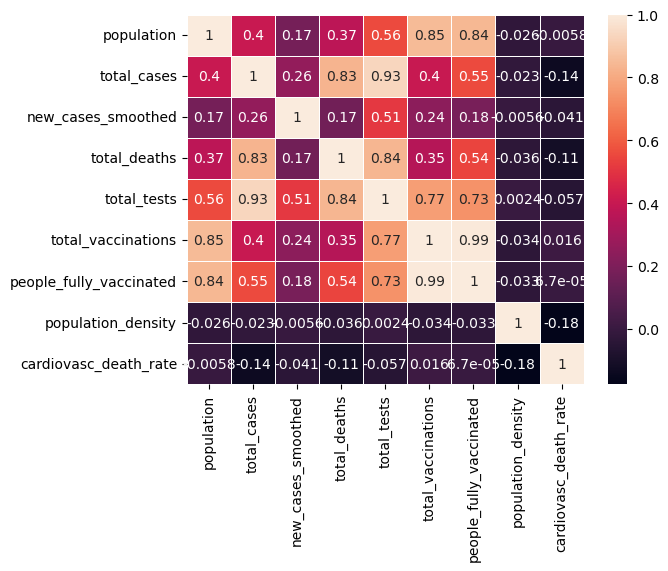

In [44]:
# heat map
sns.heatmap(corr_matrix,annot=True,linewidths=0.5)

In [45]:
# Format date

# replace '/' string with '-' in date column
df.loc[:, 'date'] = df['date'].str.replace('/', '-')

# Format the 'date' column to "day-month-year"
df.loc[:, 'date'] = pd.to_datetime(df['date'], format='%m-%d-%Y')

In [46]:
# Sort the DataFrame by a relevant column (e.g., date) if needed
df = df.sort_values(by='date')

(0.0, 71313841201.2)

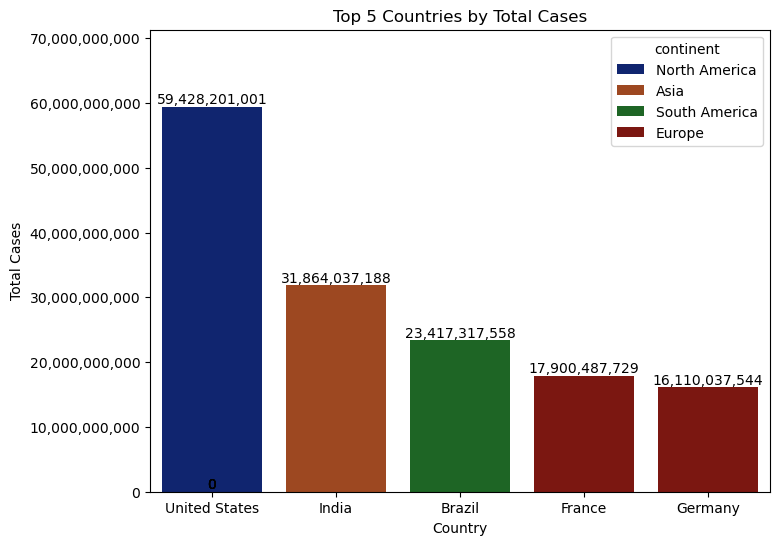

In [47]:
# display top 5 cpountries by total Cases

# Aggregate total cases by country and Continent
tc_location = df.groupby(['location', 'continent'])['total_cases'].sum().reset_index()

# Sort the countries by total cases in descending order
sorted_tc = tc_location.sort_values(by='total_cases', ascending=False). head(5)

# Plot the bar graph
plt.figure(figsize=(8, 6))
ax=sns.barplot(x='location', y='total_cases', hue='continent', data=sorted_tc, palette='dark')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('Top 5 Countries by Total Cases')

# Format y-axis to display numbers without scientific notation
plt.gca().get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Annotate each bar with the actual number
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}', 
                xy=(p.get_x() + p.get_width() / 2, height), 
                xytext=(0, 5),  # Offset label position
                textcoords='offset points',
                ha='center', va='center')

# Set y-axis limit with a bit of extra space
max_total_cases = sorted_tc['total_cases'].max()
plt.ylim(0, max_total_cases * 1.2)

In [48]:
#death ratio

df['death_ratio'] = (df['total_deaths']/df['total_cases'])*100


# Sort the DataFrame by 'total_cases' in descending order
sorted_df = df.sort_values(by='total_cases', ascending=False)

# Group by 'location' and aggregate
grouped_df = sorted_df.groupby('location').agg({
    'total_cases': 'sum',
    'total_deaths': 'sum',
    'death_ratio': 'mean',
    'population': 'first'  # Assuming population remains the same for each location
}).reset_index()

# Sort by 'total_cases' in descending order
result_table = grouped_df.sort_values(by='total_cases', ascending=False).reset_index(drop=True)

# Format columns to display in readable format
result_table['total_cases'] = result_table['total_cases'].apply(lambda x: '{:,}'.format(x))
result_table['total_deaths'] = result_table['total_deaths'].apply(lambda x: '{:,}'.format(x))
result_table['death_ratio'] = result_table['death_ratio'].apply(lambda x: '{:.2f}'.format(x))
result_table['population'] = result_table['population'].apply(lambda x: '{:,}'.format(x))

# Display the resulting table

result_table[['location', 'population','total_cases', 'total_deaths','death_ratio']].rename(columns={'death_ratio': 'avg_death_ratio'}) .head(10)


,location,population,total_cases,total_deaths,avg_death_ratio
0,United States,"338,289,856.0","59,428,201,001.0","780,059,630.0",1.96
1,India,"1,417,173,120.0","31,864,037,188.0","397,328,147.0",1.49
2,Brazil,"215,313,504.0","23,417,317,558.0","530,027,028.0",2.72
3,France,"67,813,000.0","17,900,487,729.0","120,725,726.0",3.61
4,Germany,"83,369,840.0","16,110,037,544.0","111,595,007.0",2.01
5,China,"1,425,887,360.0","15,284,703,312.0","25,375,300.0",3.14
6,United Kingdom,"67,508,936.0","13,622,967,879.0","173,949,409.0",5.21
7,Russia,"144,713,312.0","12,136,832,714.0","249,964,197.0",2.01
8,Italy,"59,037,472.0","11,660,507,245.0","139,519,953.0",4.09
9,South Korea,"51,815,808.0","10,386,079,154.0","13,347,828.0",0.95


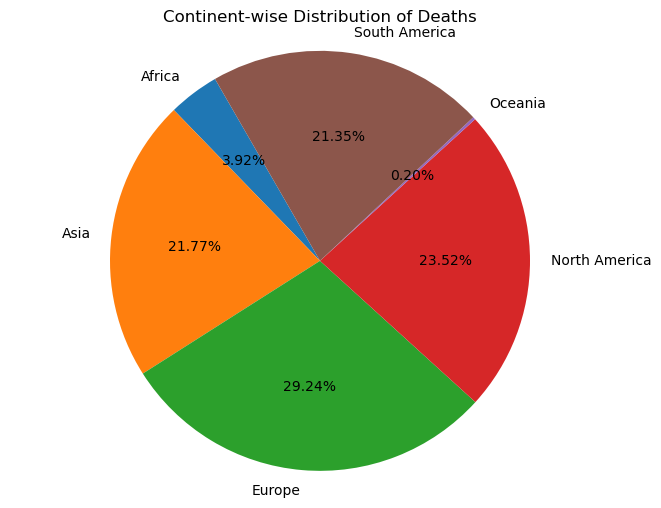

In [49]:
# % of population v/s deaths with respect to continent

continent_deaths = df.groupby('continent')['total_deaths'].sum().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(continent_deaths['total_deaths'], labels=continent_deaths['continent'], autopct='%1.2f%%', startangle=120)
plt.title('Continent-wise Distribution of Deaths')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

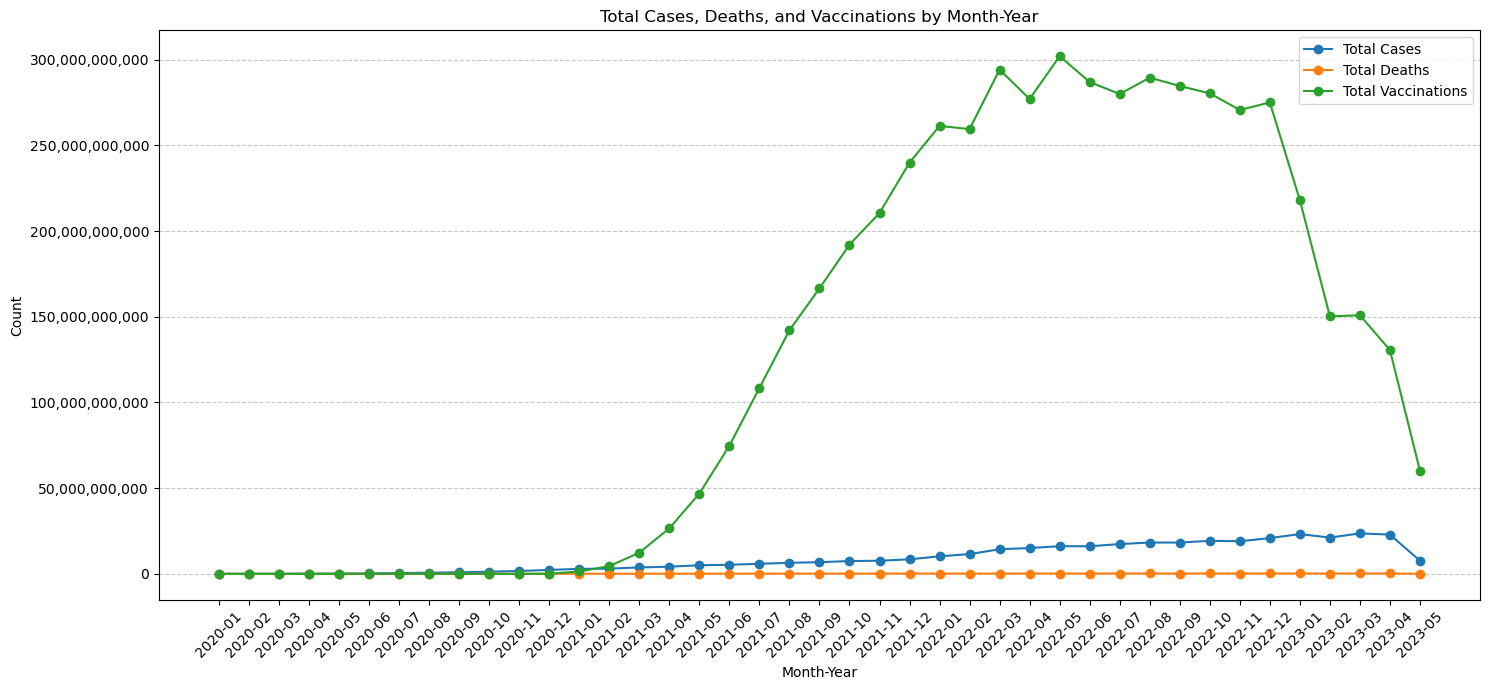

,month_year,total_cases,total_deaths,total_vaccinations
0,2020-01,3.761400e+04,911.0,0.000000e+00
1,2020-02,1.623081e+06,46831.0,0.000000e+00
2,2020-03,8.589824e+06,383654.0,0.000000e+00
3,2020-04,6.027124e+07,4484005.0,0.000000e+00
4,2020-05,1.408589e+08,10408781.0,0.000000e+00
5,2020-06,2.417111e+08,14710178.0,0.000000e+00
6,2020-07,4.252667e+08,20391335.0,0.000000e+00
7,2020-08,6.701300e+08,26471254.0,0.000000e+00
8,2020-09,9.024894e+08,31071246.0,0.000000e+00
9,2020-10,1.244760e+09,37336840.0,0.000000e+00


In [50]:

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract month and year
df['month_year'] = df['date'].dt.to_period('M')

# Group by month_year and aggregate
grouped_df = df.groupby('month_year').agg({
    'total_cases': 'sum',
    'total_deaths': 'sum',
    'total_vaccinations': 'sum'
}).reset_index()

# Plotting
plt.figure(figsize=(15, 7))

# Plot total_cases
plt.plot(grouped_df['month_year'].astype(str), grouped_df['total_cases'], marker='o', label='Total Cases')

# Plot total_deaths
plt.plot(grouped_df['month_year'].astype(str), grouped_df['total_deaths'], marker='o', label='Total Deaths')

# Plot total_vaccinations
plt.plot(grouped_df['month_year'].astype(str), grouped_df['total_vaccinations'], marker='o', label='Total Vaccinations')

plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.title('Total Cases, Deaths, and Vaccinations by Month-Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Formatter function to display actual numbers
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

grouped_df

In [51]:
#total cases in india with respect to location

# Filter for India and sum the required columns
india_data = df[df['location'] == 'India']
total_cases_sum = india_data['total_cases'].sum()
total_population_sum = india_data['population'].sum()

# Create summary table
summary_table = pd.DataFrame({
    'location': ['India'],
    'total_population_sum': [total_population_sum],
    'total_cases_sum': [total_cases_sum]
    
})

# Display summary table
pd.options.display.float_format = '{:,.0f}'.format  # Format numbers with commas and no decimals
print(summary_table)

  location  total_population_sum  total_cases_sum
0    India     1,743,122,937,600   31,864,037,188


In [52]:
# Filter for Asia continent and India location
india_data = df[df['location'] == 'India']

# Group by location and calculate the sum of total_cases and population
grouped_df = india_data.groupby('location').agg({
   'population': 'first',
    'total_tests':'sum',
    'total_vaccinations':'sum',
    'total_cases': 'sum'
    
}).reset_index()

# Display the result with normal numbers
pd.options.display.float_format = '{:,.0f}'.format  # Format numbers with commas and no decimals
print(grouped_df)

  location    population     total_tests  total_vaccinations    total_cases
0    India 1,417,173,120 296,477,930,381   1,168,362,280,616 31,864,037,188
